[800, 848.0, 864.96, 860.2546176000001, 842.717029268057, 818.4275589896245, 790.9837085357275, 762.36667858269, 733.6329278390999, 705.3362247112253, 677.7611312644558, 651.047758782381, 625.2580142496819, 600.4110361856881, 576.502409893999, 553.5147575594449, 531.4236732307545, 510.2011021408521, 489.81729178906295, 470.24193060211417, 451.4448164961663, 433.39624898808984, 416.0672562896923, 399.42972257637103, 383.456454176635, 368.12120806008585, 353.39869693000026, 339.26457979190434, 325.69544356678557, 312.6687792829732, 300.1629551109573, 288.1571877031732, 276.631512787986, 265.56675563573526, 254.94450179837574, 244.74706838171613, 234.95747601455207, 225.55942161561637, 216.53725201661285, 207.87593847077108, 199.561052056843, 191.57873997526352, 183.91570272431952, 176.5591721382697, 169.4968902655134, 162.71708906249685, 156.2084708776351, 149.96018969881814, 143.96183313784962, 138.20340512528875, 132.67530928952425, 127.36833299443106, 122.27363201059083, 117.382715795

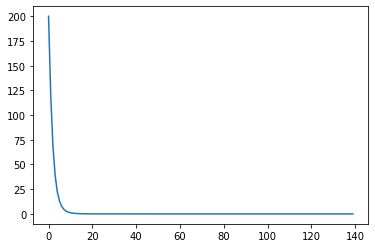

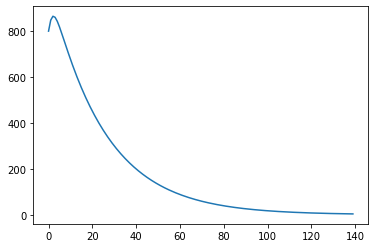

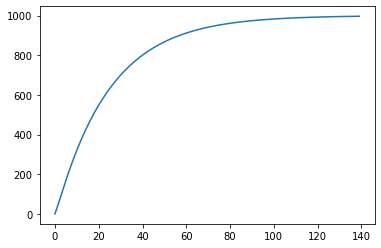

In [225]:
import numpy as np
import csv
from scipy.optimize import minimize
import matplotlib
from matplotlib import pyplot as plt 

# a=10;
# b=1.25;
# h=0.05;
# s=[10];
# I=[90];
# R=[0];
# nStep=140;
# N=[100];
# day=linspace(0,7,141);

# x = np.array([10])
# x[0]=1

# nominal state 
# How S changes: 𝑑𝑆/𝑑𝑡=−𝑎𝑆𝐼/𝑁
# How I changes: 𝑑𝐼/𝑑𝑡=𝑎𝑆𝐼/𝑁-𝐼/𝑏
# How R changes: 𝑑𝑅/𝑑𝑡=𝐼/𝑏
# 𝑁=𝑆+𝐼+𝑅

a=10
b=1.25
h=0.05
# cr = contact rate 
cr= a * h

# time /day
t=7
# total step

step=int(t*1/h)



# x=list(range(0,t))
# print(x,x[0],x[-1],)

S=list(range(0,step)); S[0]=200
I=list(range(0,step)); I[0]=800
R=list(range(0,step)); R[0]=0
𝑁=𝑆[0]+𝐼[0]+𝑅[0]

# print(S,S[0],S[9]); print(len(S)); print(s[-1])
# print(S,S[0],S[1])
# print(I,I[0],I[1])
# print(R,R[0])

for i in range(1,step):
#     print(i,S[i],I[i],R[i])
    S[i]= S[i-1] - h * (a * S[i-1] * I[i-1] / N)
    I[i]= I[i-1] + h * (a * S[i-1] * I[i-1] / N - I[i-1]/b)
    R[i]= R[i-1] + h * (I[i-1]/b)
#     print(i,S[i],I[i],R[i])
#     print()
print(I)
x=list(range(0,step))
plt.plot(x,S)
plt.show()
plt.plot(x,I)
plt.show()
plt.plot(x,R)
plt.show()

2 3
40
[0, 13.05, 22.612000000000002, 30.563413333333333, 33.50564747608333, 36.45336280142908, 39.36118555633287, 42.201298519384515, 44.958023546302755, 47.6233966209475, 50.19414232693627, 52.66976805181545, 55.05140748633165, 57.341128730769135, 59.54152124900478, 61.65544837117636, 63.685898139334775, 65.63589296748712, 67.50843482484242, 69.3064721172182, 71.03287997488627, 72.69044891420981, 74.28187877986016, 75.80977604216112, 77.27665323601589, 78.68492976739326, 80.03693358813605, 81.3349034137798, 82.58099127047737, 83.77726522931334, 84.92571223358289, 86.02824095591416, 87.08668464303807, 88.10280392012233, 89.07828953618437, 90.014765038671, 90.91378936982316, 91.77685938058058, 92.60541225995965, 93.40082787935201, 94.16443105224144, 94.8974937105613, 95.60123699940814, 96.27683329215691, 96.92540812823594, 97.54804207594857, 98.14577252279668, 98.71959539578715, 99.27046681419641, 99.79930467724054, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 

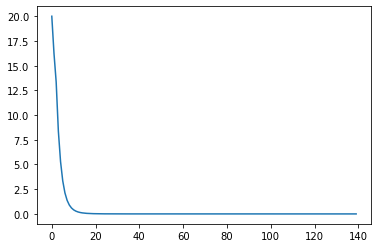

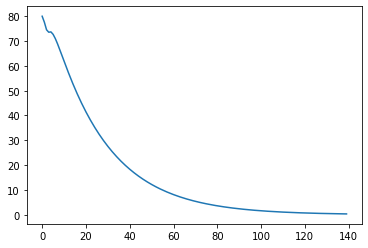

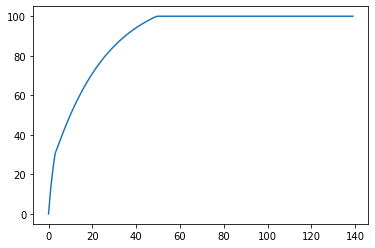

299600.0


In [227]:
import numpy as np
import csv
from scipy.optimize import minimize
import matplotlib
from matplotlib import pyplot as plt 

a=10
b=1.25
h=0.05
# cr = contact rate 
cr= a * h

# time /day
t=7
# total step

step=int(t*1/h)



# x=list(range(0,t))
# print(x,x[0],x[-1],)

S=list(range(0,step)); S[0]=20
I=list(range(0,step)); I[0]=80
R=list(range(0,step)); R[0]=0
𝑁=𝑆[0]+𝐼[0]+𝑅[0]

# print(S,S[0],S[9]); print(len(S)); print(s[-1])
# print(S,S[0],S[1])
# print(I,I[0],I[1])
# print(R,R[0])

alpha = 0.15
IR = 0.2

b2=b/2
m=10
n=10
a2=5
v=5

PL1=0
PL2=0

for i in range(1,step):
    # PL1 and PL2 both triggered
    if S[i-1]/N > alpha and (h * (a * S[i-1] * I[i-1] / N - I[i-1]/b)) > IR:
        c =( m+n )/ m
        m = m+n
        
        S[i]= S[i-1] - h * (a2 * S[i-1] * I[i-1] / N - v )
        I[i]= I[i-1] + h * (a2 * S[i-1] * I[i-1] / N - I[i-1]/b2)
        R[i]= R[i-1] + h * (c * I[i-1]/b2 + v)
        if R[i]>N:
            R[i]=N
        
        PL1=PL1+1
        PL2=PL2+1
    # PL1 triggered
    elif S[i-1]/N > alpha :
        S[i]= S[i-1] - h * (a2 * S[i-1] * I[i-1] / N - v)
        I[i]= I[i-1] + h * (a2 * S[i-1] * I[i-1] / N - I[i-1]/b2 )
        R[i]= R[i-1] + h * (I[i-1]/b2 + v)
        if R[i]>N:
            R[i]=N
        
        
        PL1=PL1+1
    # PL2 triggered     
    elif h * (a * S[i-1] * I[i-1] / N - I[i-1]/b)> IR : 
        c =( m+n )/ m
        m = m+n
        
        S[i]= S[i-1] - h * (a * S[i-1] * I[i-1] / N)
        I[i]= I[i-1] + h * (a * S[i-1] * I[i-1] / N - I[i-1]/b2)
        R[i]= R[i-1] + h * (c * I[i-1]/b2)
        if R[i]>N:
            R[i]=N
        
        PL2=PL2+1
    #     nominal state
    else:
        S[i]= S[i-1] - h * (a * S[i-1] * I[i-1] / N)
        I[i]= I[i-1] + h * (a * S[i-1] * I[i-1] / N - I[i-1]/b)
        R[i]= R[i-1] + h * (I[i-1]/b)
        if R[i]>N:
            R[i]=N
            
print(PL1,PL2)
print(m)        
print(R)        
x=list(range(0,step))
plt.plot(x,S)
plt.show()
plt.plot(x,I)
plt.show()
plt.plot(x,R)
plt.show()


H=500
E=50
T=PL1 
Em=80
Tm=PL2
cost = R[-1]*H + (10-x0[0])* 300 * E * PL1 + m * Em * PL2
print(cost)

2 3


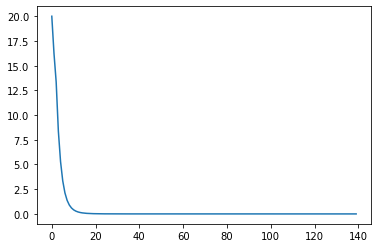

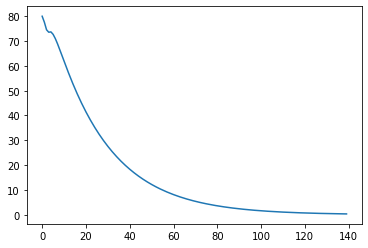

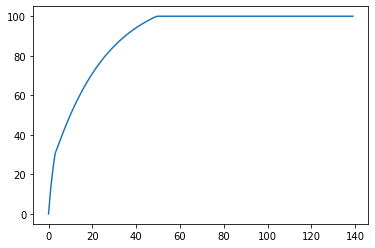

666000.0


In [236]:
import numpy as np
import csv
from scipy.optimize import minimize
import matplotlib
from matplotlib import pyplot as plt 
from scipy.optimize import differential_evolution

# a=10
# b=1.25
# h=0.05
# # cr = contact rate 
# cr= a * h

# # time /day
# t=10
# # total step

# step=int(t*1/h)

# # 'a': x0[0] ,'n':x0[1] ,'v' : x0[2] ,'m': x0[3], 'alpha': x0[4] , 'IR':x0[5]
# # x0 = np.array([2,3,5,10,0.15,2])
# # a2=x0[0]
# # n=x0[1]
# # v=x0[2]
# # m=x0[3]
# # alpha=x0[4]
# # IR=x0[5]


# # x=list(range(0,t))
# # print(x,x[0],x[-1],)

# S=list(range(0,step)); S[0]=20
# I=list(range(0,step)); I[0]=80
# R=list(range(0,step)); R[0]=0
# 𝑁=𝑆[0]+𝐼[0]+𝑅[0]

# # print(S,S[0],S[9]); print(len(S)); print(s[-1])
# # print(S,S[0],S[1])
# # print(I,I[0],I[1])
# # print(R,R[0])

# # alpha = 0.15
# # IR = 0.2

# b2=b/2
# # m=10
# # n=10
# # a2=5
# # v=5

def DiseaseModel(x0):
    a=10
    b=1.25
    h=0.05
    
    t=7
    step=int(t*1/h)
    
    S=list(range(0,step)); S[0]=200
    I=list(range(0,step)); I[0]=800
    R=list(range(0,step)); R[0]=0
    N=S[0]+I[0]+R[0]
    
    PL1=0
    PL2=0
    
    a2=x0[0]
    n=x0[1]
    v=x0[2]
    m=x0[3]
    alpha=x0[4]
    IR=x0[5]
    
    b2=b/2
       
    for i in range(1,step):
    # PL1 and PL2 both triggered
        if S[i-1]/N > alpha and (h * (a * S[i-1] * I[i-1] / N - I[i-1]/b)) > IR:
            c =( m+n )/ m
            m = m+n
        
            S[i]= S[i-1] - h * (a2 * S[i-1] * I[i-1] / N - v )
            I[i]= I[i-1] + h * (a2 * S[i-1] * I[i-1] / N - I[i-1]/b2)
            R[i]= R[i-1] + h * (c * I[i-1]/b2 + v)
            if R[i]>N:
                R[i]=N
        
            PL1=PL1+1
            PL2=PL2+1
    # PL1 triggered
        elif S[i-1]/N > alpha :
            S[i]= S[i-1] - h * (a2 * S[i-1] * I[i-1] / N - v)
            I[i]= I[i-1] + h * (a2 * S[i-1] * I[i-1] / N - I[i-1]/b2 )
            R[i]= R[i-1] + h * (I[i-1]/b2 + v)
            if R[i]>N:
                R[i]=N
        
        
            PL1=PL1+1
    # PL2 triggered     
        elif h * (a * S[i-1] * I[i-1] / N - I[i-1]/b)> IR : 
            c =( m+n )/ m
            m = m+n
        
            S[i]= S[i-1] - h * (a * S[i-1] * I[i-1] / N)
            I[i]= I[i-1] + h * (a * S[i-1] * I[i-1] / N - I[i-1]/b2)
            R[i]= R[i-1] + h * (c * I[i-1]/b2)
            if R[i]>N:
                R[i]=N
        
            PL2=PL2+1
    #     nominal state
        else:
            S[i]= S[i-1] - h * (a * S[i-1] * I[i-1] / N)
            I[i]= I[i-1] + h * (a * S[i-1] * I[i-1] / N - I[i-1]/b)
            R[i]= R[i-1] + h * (I[i-1]/b)
            if R[i]>N:
                R[i]=N
                
    H=500
    E=50
    T=PL1 
    Em=80
    Tm=PL2        
    return R[-1]*H + (10-x0[0])* 300 * E * PL1 + m * Em * PL2

print(PL1,PL2)
# print(m)        
# print(R)        

x=list(range(0,step))
plt.plot(x,S)
plt.show()
plt.plot(x,I)
plt.show()
plt.plot(x,R)
plt.show()

# H=500
# E=50
# T=PL1 # equal to  total time
# Em=80
# Tm=PL2

# def cost(x):
# #     x0 = np.array([x[0],x[1],x[2],x[3],x[4],x[5]])
#     money = DiseaseModel(x0)

# # 'a2': x0[0] ,'n':x0[1] ,'v' : x0[2] ,'m': x0[3], 'alpha': x0[4] , 'IR':x0[5]    
# x0 = np.array([2,3,5,4,0.3,10])
# money=DiseaseModel(x0)
# print(money)


x0 = np.array([5,10,5,10,0.15,0.2])
money=DiseaseModel(x0)
print(money)

# res = minimize(DiseaseModel, x0, method='nelder-mead',
# options={'xatol': 1e-8, 'disp': True})

# print(res.x)

# # 'a2': x0[0] ,'n':x0[1] ,'v' : x0[2] ,'m': x0[3], 'alpha': x0[4] , 'IR':x0[5]  
# bounds = [(4.9, 5.1), (9.9, 10.1),(4.9, 5.1),(9.9, 10.1),(0.14, 0.16),(0.1, 0.3)]
# result = differential_evolution(DiseaseModel, bounds, maxiter=10000)
# result.x, result.fun

# alpha = 0.15
# IR = 0.2

# b2=b/2
# m=10
# n=10
# a2=5
# v=5
# def cost(x):
#     x0 = np.array([x[0],x[1],x[2],x[3],x[4],x[5]])
#     money = DiseaseModel(x0)
#     return money
# #     try:
# #         endresults, resgraph, mdlhist_pl1 = fp.run_nominal(dm1)
# #         Imax= endresults['classification']['total recovery people']
# #         Nm=endresults['classification']['total number of medical staff']
# #         return Imax*H + (10-x0[0])* 300 * E*T+ Nm*Em*Tm*T
# #     except:
# #         return 10000000000
# bounds = [(0, 2), (0, 2),(0, 2),(0, 2),(0, 2),(0, 2)]
# result = differential_evolution(cost, bounds)
# result.x, result.fun
# # 'a': x0[0] ,'n':x0[1] ,'v' : x0[2] ,'m': x0[3], 'alpha': x0[4] , 'IR':x0[5]
# print('a=',result.x[0])
# print('n=',result.x[1])
# print('v=',result.x[2])
# print('m=',result.x[3])
# print('alpha=',result.x[4])
# print('IR=',result.x[5])
# print('cost=',result.fun)




In [237]:
result.x[0]

5.1

In [ ]:
cost= 656504.0 R
cost= 583004.0 I
cost= 583004.0 S